In [1]:
from mobilenetv3 import MobileNetSkipConcat
from matplotlib import pyplot as plt
import torch

device = (
        "cuda"
        if torch.cuda.is_available()
        else "mps"
        if torch.backends.mps.is_available()
        else "cpu"
    )
print(f"Now using device: {device}")
model = MobileNetSkipConcat().to(torch.device(device))
model.load_state_dict(torch.load('mbnv3_epoch_100.pt', map_location=torch.device(device))['model_state_dict'])

Now using device: cpu


<All keys matched successfully>

In [2]:
def compute_errors(gt, pred, epsilon=1e-6):
    # Ensure non-zero and non-negative ground truth values
    gt = gt.float().to('cpu')
    pred = pred.float().to('cpu')

    gt = torch.clamp(gt, min=epsilon)
    pred = torch.clamp(pred, min=epsilon)  # Also ensure predictions are positive

    thresh = torch.max((gt / pred), (pred / gt))
    a1 = (thresh < 1.25).float().mean()
    a2 = (thresh < (1.25 ** 2)).float().mean()
    a3 = (thresh < (1.25 ** 3)).float().mean()

    rmse = torch.sqrt(((gt - pred) ** 2).mean())
    rmse_log = torch.sqrt(((torch.log(gt) - torch.log(pred)) ** 2).mean())

    abs_rel = torch.mean(torch.abs(gt - pred) / gt)
    sq_rel = torch.mean(((gt - pred) ** 2) / gt)

    return abs_rel, sq_rel, rmse, rmse_log, a1, a2, a3

In [3]:
import h5dataset
import h5py
import utils

utils.federated_eval('C:/Users/vliew/Documents/UTAustin/Fall2023/SeniorDesign/FH12-EdgeMapper/Device1/orgspace.h5')

1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
abs_rel: 0.3282099962234497
sq_rel: 1.266364336013794
rmse: 3.410653591156006
rmse_log: 0.44929513335227966


In [25]:
f = h5py.File('C:/Users/vliew/Documents/UTAustin/Fall2023/SeniorDesign/FH12-EdgeMapper/Device1/orgspace.h5')

print(len(f['images']))


453


In [31]:
import random
errors = []

random_indices = set()
while len(random_indices) < 100:
    random_indices.add(random.randint(0, len(f['images']) - 1))


model.eval()
with torch.no_grad():
    for i, idx in enumerate(list(random_indices)):
        print(f'{i + 1} / 100')
        img = f['images'][idx].astype(float)
        img = torch.Tensor(img) / 255.0
        img = img.permute(2, 1, 0)

        gt = f['depths'][idx]
        gt = torch.Tensor(gt)
        gt = gt.unsqueeze(0).permute(0, 2, 1)
        gt = gt / 1000.0
        gt = torch.clamp(gt, 10, 1000)

        input_tensor = img.unsqueeze(0)

        pred = model(input_tensor)
        pred = pred.squeeze(0)

        errors.append(compute_errors(gt, pred))

    error_tensors = [torch.tensor(e).to(device) for e in errors]

    error_stack = torch.stack(error_tensors, dim=0)

    mean_errors = error_stack.mean(0).cpu().numpy()

    abs_rel = mean_errors[0]
    sq_rel = mean_errors[1]
    rmse = mean_errors[2]
    rmse_log = mean_errors[3]
    a1 = mean_errors[4]
    a2 = mean_errors[5]
    a3 = mean_errors[6]
    print(f'abs_rel: {abs_rel}\nsq_rel: {sq_rel}\nrmse: {rmse}\nrmse_log: {rmse_log}\na1: {a1}\na2: {a2}\na3: {a3}\n')
        
    

1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
abs_rel: 0.32795605063438416
sq_rel: 1.261425495147705
rmse: 3.407378911972046
rmse_log: 0.44976478815078735

In [16]:
def test():
    model.eval()
    running_loss = 0.0
    errors = []
    l1_loss = torch.nn.L1Loss()
    with torch.no_grad():
        for batch_idx, batch in enumerate(val_loader):
            print (f'{batch_idx} / {len(val_loader)}')
            image = torch.Tensor(batch['image']).to(device)
            depth = torch.Tensor(batch['depth']).to(device)

            pred = model(image)

            depth = 1000.0 / depth

            depth = depth.squeeze(0)
            pred = pred.squeeze(0)
            image = image.squeeze(0)


            fig, ax = plt.subplots(1, 3, figsize=(16, 8))
            ax[0].imshow(depth.permute(1, 2, 0))
            ax[1].imshow(pred.permute(1, 2, 0))
            ax[2].imshow(image.permute(1, 2, 0))

            print(depth.shape)
            print(pred.shape)

            errors.append(compute_errors(depth, pred))
            break

        
    error_tensors = [torch.tensor(e).to(device) for e in errors]

    error_stack = torch.stack(error_tensors, dim=0)

    mean_errors = error_stack.mean(0).cpu().numpy()

    abs_rel = mean_errors[0]
    sq_rel = mean_errors[1]
    rmse = mean_errors[2]
    rmse_log = mean_errors[3]
    a1 = mean_errors[4]
    a2 = mean_errors[5]
    a3 = mean_errors[6]
    print(f'abs_rel: {abs_rel}\nsq_rel: {sq_rel}\nrmse: {rmse}\nrmse_log: {rmse_log}\na1: {a1}\na2: {a2}\na3: {a3}\n')


c:\Users\vliew\Documents\UTAustin\Fall2023\SeniorDesign\FH12-EdgeMapper\comm-deploy\dataset.py:106: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


0 / 153
torch.Size([1, 480, 640])
torch.Size([1, 480, 640])
abs_rel: 2.0103189945220947
sq_rel: 31.827157974243164
rmse: 47.917564392089844
rmse_log: 1.7366396188735962
a1: 0.01783854141831398
a2: 0.03463541716337204
a3: 0.3039095103740692



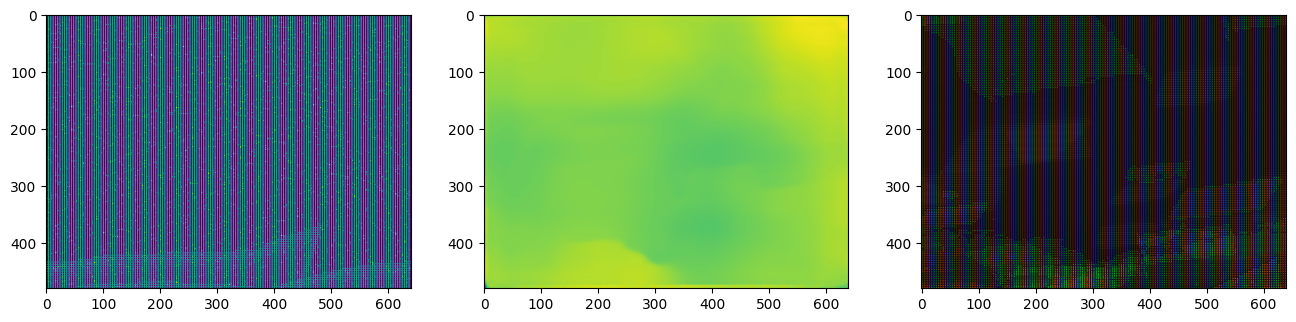

In [17]:
test()

In [21]:
num_trainloader = len(train_loader)
model.eval()
with torch.no_grad():
    eval_metrics = tuple()
    for batch_idx, batch in enumerate(train_loader):

        print(f'{batch_idx} / {num_trainloader}')

        image = torch.Tensor(batch['image']).to(device)
        depth = torch.Tensor(batch['depth']).to(device)

        normalized_depth = 1000.0 / depth 
        
        pred = model(image)
        
        abs_rel, sq_rel, rmse, rmse_log, a1, a2, a3 = compute_errors(depth, normalized_depth)
        eval_metrics += compute_errors(depth, normalized_depth)
    
        # print(f'abs_rel: {abs_rel}\nsq_rel: {sq_rel}\nrmse: {rmse}\nrmse_log: {rmse_log}\na1: {a1}\na2: {a2}\na3: {a3}\n')
        print(eval_metrics)
    
    print(eval_metrics)

0 / 153
(tensor(3.0527), tensor(570.3206), tensor(476.4237), tensor(4.7240), tensor(0.0077), tensor(0.0077), tensor(0.0077))
1 / 153
(tensor(3.0527), tensor(570.3206), tensor(476.4237), tensor(4.7240), tensor(0.0077), tensor(0.0077), tensor(0.0077), tensor(3.1037), tensor(568.5250), tensor(476.2855), tensor(4.6708), tensor(0.0105), tensor(0.0135), tensor(0.0164))
2 / 153
(tensor(3.0527), tensor(570.3206), tensor(476.4237), tensor(4.7240), tensor(0.0077), tensor(0.0077), tensor(0.0077), tensor(3.1037), tensor(568.5250), tensor(476.2855), tensor(4.6708), tensor(0.0105), tensor(0.0135), tensor(0.0164), tensor(3.0721), tensor(574.2322), tensor(480.7969), tensor(4.7298), tensor(0.0075), tensor(0.0075), tensor(0.0075))
3 / 153
(tensor(3.0527), tensor(570.3206), tensor(476.4237), tensor(4.7240), tensor(0.0077), tensor(0.0077), tensor(0.0077), tensor(3.1037), tensor(568.5250), tensor(476.2855), tensor(4.6708), tensor(0.0105), tensor(0.0135), tensor(0.0164), tensor(3.0721), tensor(574.2322), te

KeyboardInterrupt: 